In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
for row in session.query(Measurement.date, Measurement.prcp):
    print(row)

('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-06', None)
('2010-01-07', 0.06)
('2010-01-08', 0.0)
('2010-01-09', 0.0)
('2010-01-10', 0.0)
('2010-01-11', 0.01)
('2010-01-12', 0.0)
('2010-01-14', 0.0)
('2010-01-15', 0.0)
('2010-01-16', 0.0)
('2010-01-17', 0.0)
('2010-01-18', 0.0)
('2010-01-19', 0.0)
('2010-01-20', 0.0)
('2010-01-21', 0.0)
('2010-01-22', 0.0)
('2010-01-23', 0.0)
('2010-01-24', 0.01)
('2010-01-25', 0.0)
('2010-01-26', 0.04)
('2010-01-27', 0.12)
('2010-01-28', 0.0)
('2010-01-30', None)
('2010-01-31', 0.03)
('2010-02-01', 0.01)
('2010-02-03', None)
('2010-02-04', 0.01)
('2010-02-05', 0.0)
('2010-02-06', 0.0)
('2010-02-07', 0.0)
('2010-02-08', 0.0)
('2010-02-09', 0.0)
('2010-02-11', 0.0)
('2010-02-12', 0.02)
('2010-02-13', 0.01)
('2010-02-14', 0.0)
('2010-02-15', 0.0)
('2010-02-16', 0.0)
('2010-02-17', 0.0)
('2010-02-19', None)
('2010-02-20', 0.03)
('2010-02-21', 0.0)
('2010-02-22', 0.0)
('2010-02-23', 0.0)
('2010-02-24', 0.0)
('20

('2016-05-06', 0.0)
('2016-05-07', 0.03)
('2016-05-08', 0.0)
('2016-05-09', 0.0)
('2016-05-10', 0.0)
('2016-05-11', 0.0)
('2016-05-12', 0.0)
('2016-05-13', 0.0)
('2016-05-14', 0.0)
('2016-05-15', 0.02)
('2016-05-16', 0.0)
('2016-05-17', 0.0)
('2016-05-18', 0.0)
('2016-05-19', 0.0)
('2016-05-20', 0.01)
('2016-05-21', 0.03)
('2016-05-22', 0.0)
('2016-05-23', 0.0)
('2016-05-24', 0.0)
('2016-05-25', 0.0)
('2016-05-26', 0.06)
('2016-05-27', 0.0)
('2016-05-28', 0.1)
('2016-05-29', 0.54)
('2016-05-30', 0.16)
('2016-05-31', 0.05)
('2016-06-01', 0.06)
('2016-06-02', 0.0)
('2016-06-03', 0.0)
('2016-06-04', 0.0)
('2016-06-05', 0.0)
('2016-06-06', 0.0)
('2016-06-07', 0.01)
('2016-06-08', 0.0)
('2016-06-09', 0.01)
('2016-06-10', 0.05)
('2016-06-11', 0.0)
('2016-06-12', 0.01)
('2016-06-13', 0.0)
('2016-06-14', 0.0)
('2016-06-15', 0.01)
('2016-06-16', 0.02)
('2016-06-17', 0.02)
('2016-06-18', 0.0)
('2016-06-19', 0.01)
('2016-06-20', 0.01)
('2016-06-21', 0.0)
('2016-06-22', 0.0)
('2016-06-23', 0.0)
('

('2015-03-03', 0.02)
('2015-03-04', 0.06)
('2015-03-05', 0.52)
('2015-03-06', 0.06)
('2015-03-07', 0.0)
('2015-03-08', 0.01)
('2015-03-09', 0.0)
('2015-03-10', 0.03)
('2015-03-11', 0.0)
('2015-03-12', 0.0)
('2015-03-13', 0.02)
('2015-03-14', 0.0)
('2015-03-15', 0.0)
('2015-03-16', 0.01)
('2015-03-17', 0.0)
('2015-03-18', 0.0)
('2015-03-19', 0.0)
('2015-03-20', 0.11)
('2015-03-21', 0.08)
('2015-03-22', 0.05)
('2015-03-23', 0.0)
('2015-03-24', 0.0)
('2015-03-25', 0.02)
('2015-03-26', 0.06)
('2015-03-27', 0.0)
('2015-03-28', 0.0)
('2015-03-29', 0.38)
('2015-03-30', 0.02)
('2015-03-31', 0.6)
('2015-04-01', 0.24)
('2015-04-02', 0.01)
('2015-04-03', 0.0)
('2015-04-04', 0.0)
('2015-04-05', 0.06)
('2015-04-06', 0.0)
('2015-04-07', 0.0)
('2015-04-08', 0.19)
('2015-04-09', 0.03)
('2015-04-10', 0.0)
('2015-04-11', 0.0)
('2015-04-12', 0.09)
('2015-04-13', 0.03)
('2015-04-14', 0.01)
('2015-04-15', 0.05)
('2015-04-16', 0.04)
('2015-04-17', 0.01)
('2015-04-18', 0.02)
('2015-04-19', 0.0)
('2015-04-20'

('2015-06-22', 0.04)
('2015-06-23', 0.02)
('2015-06-24', 0.01)
('2015-06-25', 0.2)
('2015-06-26', 0.11)
('2015-06-27', 0.09)
('2015-06-28', 0.0)
('2015-06-29', 0.11)
('2015-06-30', 1.1)
('2015-07-01', 0.0)
('2015-07-06', None)
('2015-07-08', None)
('2015-07-11', None)
('2015-07-12', 0.15)
('2015-07-13', 0.06)
('2015-07-14', 0.11)
('2015-07-15', 0.04)
('2015-07-16', 0.21)
('2015-07-17', 1.24)
('2015-07-18', 0.01)
('2015-07-20', None)
('2015-07-21', 0.0)
('2015-07-22', 0.0)
('2015-07-23', 0.0)
('2015-07-24', 0.03)
('2015-07-25', 0.2)
('2015-07-26', 0.0)
('2015-07-27', 0.0)
('2015-07-28', 0.0)
('2015-07-29', 0.0)
('2015-07-30', 0.01)
('2015-08-11', None)
('2015-08-12', 0.0)
('2015-08-13', 0.0)
('2015-08-14', 0.09)
('2015-08-15', 0.33)
('2015-08-17', None)
('2015-08-18', 0.2)
('2015-08-19', 0.2)
('2015-08-20', 0.0)
('2015-08-21', 0.0)
('2015-08-22', 0.0)
('2015-08-23', 0.62)
('2015-08-24', 3.7)
('2015-08-25', 0.13)
('2015-08-26', 0.11)
('2015-08-27', 0.05)
('2015-08-28', 0.0)
('2015-08-29'

('2011-07-07', 0.74)
('2011-08-08', None)
('2011-08-10', None)
('2011-08-12', None)
('2011-08-24', 0.0)
('2011-09-01', 0.01)
('2011-09-02', 0.08)
('2011-09-07', 0.0)
('2011-09-09', 0.0)
('2011-09-23', None)
('2011-09-26', None)
('2011-10-20', 0.0)
('2011-10-31', None)
('2011-11-04', 0.6)
('2012-01-05', 0.1)
('2012-01-09', 0.0)
('2012-01-10', 0.0)
('2012-01-11', 0.01)
('2012-01-12', 0.1)
('2012-01-14', 0.0)
('2012-01-16', None)
('2012-01-17', 0.26)
('2012-01-18', 1.26)
('2012-01-19', 0.0)
('2012-01-20', 0.0)
('2012-01-23', None)
('2012-01-24', 0.0)
('2012-01-25', 0.0)
('2012-01-26', 0.06)
('2012-01-27', 1.03)
('2012-01-28', 0.05)
('2012-01-29', 0.05)
('2012-01-31', None)
('2012-02-06', None)
('2012-02-09', None)
('2012-02-10', 0.0)
('2012-02-14', None)
('2012-02-15', 0.0)
('2012-02-24', None)
('2012-02-27', None)
('2012-02-29', None)
('2012-03-01', 0.0)
('2012-03-03', 0.22)
('2012-03-04', 2.7)
('2012-03-05', 0.92)
('2012-04-02', None)
('2012-04-04', None)
('2012-04-05', 0.3)
('2012-04-0

('2016-10-22', 0.0)
('2016-10-23', 0.0)
('2016-10-24', 0.0)
('2016-10-25', 0.12)
('2016-10-26', 0.02)
('2016-10-27', 0.08)
('2016-10-28', 0.06)
('2016-10-29', 0.01)
('2016-10-30', 0.0)
('2016-10-31', 0.13)
('2016-11-01', 0.01)
('2016-11-02', 0.0)
('2016-11-03', 0.0)
('2016-11-04', 0.0)
('2016-11-05', 0.02)
('2016-11-06', 0.0)
('2016-11-07', 0.0)
('2016-11-08', 0.15)
('2016-11-09', 0.0)
('2016-11-10', 0.0)
('2016-11-11', 0.0)
('2016-11-12', 0.0)
('2016-11-13', 0.0)
('2016-11-14', 0.0)
('2016-11-15', 0.0)
('2016-11-16', 0.07)
('2016-11-17', 0.0)
('2016-11-18', 0.02)
('2016-11-19', 0.13)
('2016-11-20', 0.4)
('2016-11-21', 0.07)
('2016-11-22', 0.31)
('2016-11-23', 0.03)
('2016-11-24', 0.21)
('2016-11-25', 0.11)
('2016-11-26', 0.03)
('2016-11-27', 0.0)
('2016-11-28', 0.0)
('2016-11-29', 0.06)
('2016-11-30', 0.0)
('2016-12-01', 0.16)
('2016-12-02', 0.01)
('2016-12-03', 0.02)
('2016-12-04', 0.32)
('2016-12-05', 0.45)
('2016-12-06', 0.0)
('2016-12-07', 0.07)
('2016-12-08', 0.01)
('2016-12-10',

('2015-01-02', 0.0)
('2015-01-03', 1.55)
('2015-01-04', 0.05)
('2015-01-05', 0.0)
('2015-01-06', 0.06)
('2015-01-07', 0.0)
('2015-01-08', 0.0)
('2015-01-09', 0.0)
('2015-01-10', 0.05)
('2015-01-11', 0.0)
('2015-01-12', 0.0)
('2015-01-13', 0.0)
('2015-01-14', 0.0)
('2015-01-15', 0.0)
('2015-01-16', 0.01)
('2015-01-17', 0.0)
('2015-01-18', 0.0)
('2015-01-19', 0.0)
('2015-01-20', 0.0)
('2015-01-21', 0.0)
('2015-01-22', 0.0)
('2015-01-23', 0.0)
('2015-01-24', 0.18)
('2015-01-25', 0.78)
('2015-01-26', 0.77)
('2015-01-27', 0.0)
('2015-01-28', 0.06)
('2015-01-29', 0.0)
('2015-01-30', 0.09)
('2015-01-31', 0.0)
('2015-02-01', 0.02)
('2015-02-02', 0.0)
('2015-02-03', 0.0)
('2015-02-04', 1.29)
('2015-02-05', 0.0)
('2015-02-06', 0.0)
('2015-02-07', 0.0)
('2015-02-08', 0.0)
('2015-02-09', 0.0)
('2015-02-10', 0.24)
('2015-02-11', 0.0)
('2015-02-12', 0.0)
('2015-02-13', 0.0)
('2015-02-14', 0.21)
('2015-02-15', 1.42)
('2015-02-16', 0.01)
('2015-02-17', 0.0)
('2015-02-18', 0.0)
('2015-02-19', 0.0)
('20

('2014-01-07', 0.0)
('2014-01-08', 0.0)
('2014-01-09', 0.01)
('2014-01-10', 0.0)
('2014-01-11', 0.06)
('2014-01-12', 0.19)
('2014-01-13', 0.42)
('2014-01-14', 0.31)
('2014-01-15', 0.0)
('2014-01-16', 0.02)
('2014-01-17', 0.0)
('2014-01-18', 0.01)
('2014-01-19', 0.0)
('2014-01-20', 0.0)
('2014-01-21', 0.0)
('2014-01-22', 0.5)
('2014-01-23', 0.0)
('2014-01-24', 0.0)
('2014-01-25', 0.0)
('2014-01-26', 0.0)
('2014-01-27', 0.14)
('2014-01-29', 0.12)
('2014-01-30', 0.0)
('2014-01-31', 0.0)
('2014-02-01', 0.03)
('2014-02-02', 0.1)
('2014-02-03', 0.0)
('2014-02-04', 0.38)
('2014-02-05', 0.42)
('2014-02-06', 0.01)
('2014-02-07', 0.01)
('2014-02-08', 0.0)
('2014-02-09', 0.0)
('2014-02-10', 0.0)
('2014-02-11', 0.0)
('2014-02-12', 0.0)
('2014-02-13', 0.0)
('2014-02-14', 0.0)
('2014-02-15', 0.01)
('2014-02-16', 0.12)
('2014-02-17', 0.27)
('2014-02-18', 0.03)
('2014-02-19', 0.01)
('2014-02-20', 0.0)
('2014-02-21', 0.0)
('2014-02-22', 0.0)
('2014-02-23', 0.0)
('2014-02-24', 0.0)
('2014-02-25', 0.0)
(

('2015-09-26', 1.02)
('2015-09-27', 1.72)
('2015-09-28', 4.18)
('2015-09-29', 0.65)
('2015-09-30', 1.4)
('2015-10-01', 0.41)
('2015-10-02', 0.17)
('2015-10-03', 0.02)
('2015-10-04', 0.23)
('2015-10-05', 0.51)
('2015-10-06', 0.41)
('2015-10-07', 0.15)
('2015-10-08', 0.03)
('2015-10-09', 0.0)
('2015-10-10', 0.0)
('2015-10-12', None)
('2015-10-13', 0.31)
('2015-10-14', 0.59)
('2015-10-15', 1.77)
('2015-10-16', 0.33)
('2015-10-17', 1.8)
('2015-10-20', None)
('2015-10-21', 0.32)
('2015-10-22', 0.28)
('2015-10-23', 0.32)
('2015-10-24', 0.04)
('2015-10-25', 0.0)
('2015-10-26', 0.01)
('2015-10-27', 2.0)
('2015-10-28', 0.22)
('2015-10-29', 0.02)
('2015-10-30', 0.0)
('2015-10-31', 2.45)
('2015-11-01', 1.2)
('2015-11-03', None)
('2015-11-04', 0.18)
('2015-11-05', 1.09)
('2015-11-06', 0.76)
('2015-11-07', 1.08)
('2015-11-08', 0.32)
('2015-11-09', 1.42)
('2015-11-10', 0.43)
('2015-11-11', 0.37)
('2015-11-12', 0.43)
('2015-11-13', 0.68)
('2015-11-14', 1.73)
('2015-11-15', 0.05)
('2015-11-17', None)


In [11]:
# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [25]:
# Perform a query to retrieve the data and precipitation score
oneyear = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-23').order_by(Measurement.date).all()
oneyear

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [ ]:
# Save the query results as a Pandas DataFrame and set the index to the date column

oneyear_df = pd.DataFrame(oneyear)

# Sort the dataframe by date

oneyear_df.set_index('date')

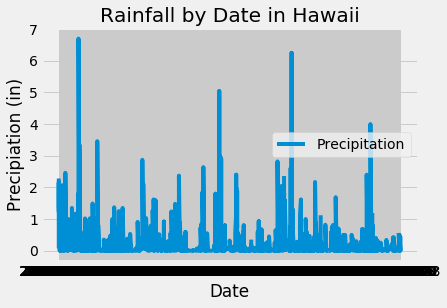

In [37]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation, = plt.plot(oneyear_df['date'], oneyear_df['prcp'], label="Precipitation")
plt.legend(handles=[precipitation], loc='best')
plt.xlabel("Date")
plt.ylabel("Precipiation (in)")
plt.title("Rainfall by Date in Hawaii")
plt.show()

In [39]:
# Use Pandas to calcualte the summary statistics for the precipitation data
oneyear_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# Design a query to show how many stations are available in this dataset?


In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment